# Introodução à programação no QISKIT

In [5]:
!pip install qiskit
!pip install qiskit_aer
!pip install pylatexenc
!pip install qiskit_ibm_runtime

# Definição das bibliotecas 
## OBS - Usando Google Colab

In [6]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.circuit.library import *
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import plot_bloch_vector
from qiskit_aer import Aer
from qiskit.visualization import plot_bloch_multivector
import math
import qiskit
from qiskit import qasm3
from qiskit.quantum_info import state_fidelity
from qiskit.quantum_info import DensityMatrix
from qiskit.visualization import plot_state_qsphere
from qiskit import transpile
from qiskit.visualization import plot_state_city, plot_histogram
from qiskit.providers.basic_provider import BasicSimulator
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector

from qiskit.circuit.library import GroverOperator, MCMT, ZGate
from qiskit.visualization import plot_distribution

## Versão do QISKIT utilizada neste LAB

In [7]:
qiskit.__version__

'2.0.0'

## Exemplo de BlockSphere

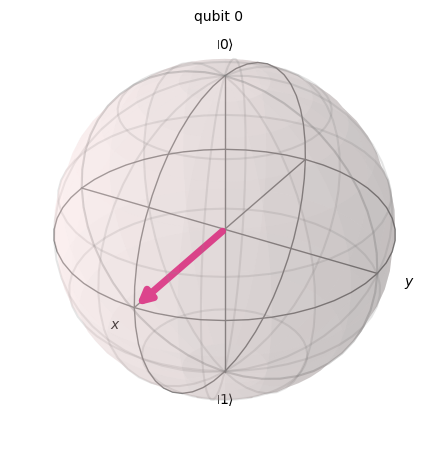

In [8]:
qc = QuantumCircuit(1,1)
qc.h(0)
#qc.rx(math.pi / 8 , 0)
#qc.rz(math.pi /2, 0)
#qc.ry(math.pi / 2, 0)
#qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})
plot_bloch_multivector(qc)

## Modificando estados de um QUBIT

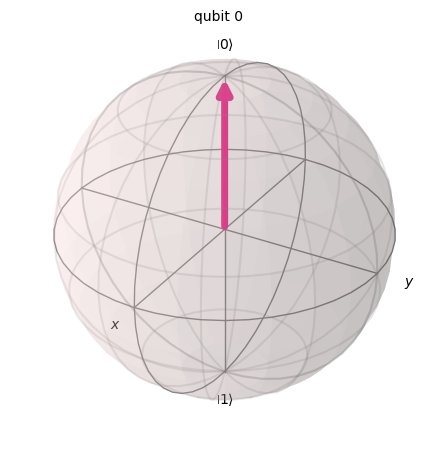

In [9]:
qc = QuantumCircuit(1,1)
qc.rz(math.pi / 4, 0)
plot_bloch_multivector(qc)

## Alterando para estados mais complexos

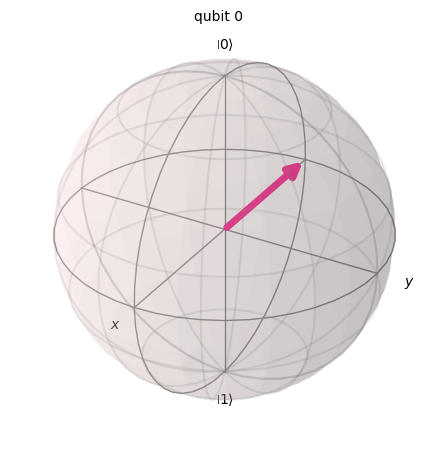

In [10]:
qc = QuantumCircuit(1,1)
qc.rx(math.pi / 2, 0)
qc.rz(3 * math.pi/2, 0)
plot_bloch_multivector(qc)

## Circuitos Quânticos

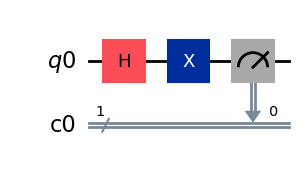

In [11]:
from qiskit import *
from qiskit.providers.basic_provider import BasicSimulator
from qiskit import QuantumCircuit

q = QuantumRegister(1)
c = ClassicalRegister(1)
qc = QuantumCircuit(q, c)
qc.h(0)
qc.x(0)
qc.measure(0,0)
qc.draw(output='mpl')


## Exemplo PORTA NOT - X

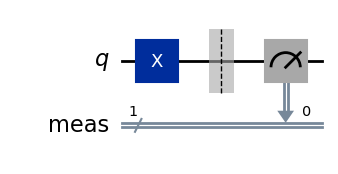

In [12]:
qc = QuantumCircuit(1)
qc.x(0)
qc.measure_all()
qc.draw(output='mpl')

## Porta Hadamard

In [13]:
circ = QuantumCircuit(1)
circ.h(0)
circ.measure_all()
simulator = BasicSimulator()
result = simulator.run(circ).result()
counts = result.get_counts()
print(counts)

{'1': 499, '0': 525}


## Entrelaçamento de QUBITS

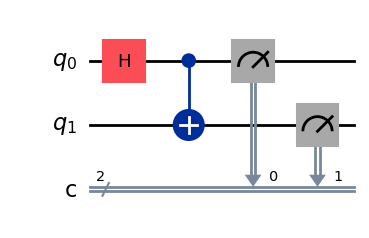

In [15]:
from qiskit.providers.basic_provider import BasicSimulator
from qiskit import QuantumCircuit

circ = QuantumCircuit(2,2)
circ.h(0)
circ.cx(0,1)
circ.measure(0,0)
circ.measure(1,1)
circ.draw(output='mpl')

In [16]:
simulator = BasicSimulator()
result = simulator.run(circ).result()
counts = result.get_counts()
print(counts)

{'11': 526, '00': 498}


## Explorando estados de superposição

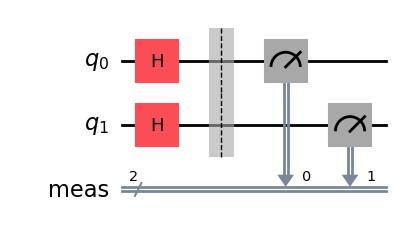

In [17]:
from qiskit.providers.basic_provider import BasicSimulator
from qiskit import QuantumCircuit

circ = QuantumCircuit(2)
circ.h(0)
circ.h(1)
circ.measure_all()
circ.draw(output='mpl')

In [18]:
simulator = BasicSimulator()
result = simulator.run(circ, shots=2000).result()
counts = result.get_counts()
print(counts)

{'10': 487, '01': 492, '11': 526, '00': 495}


## Rotações de QUBITS

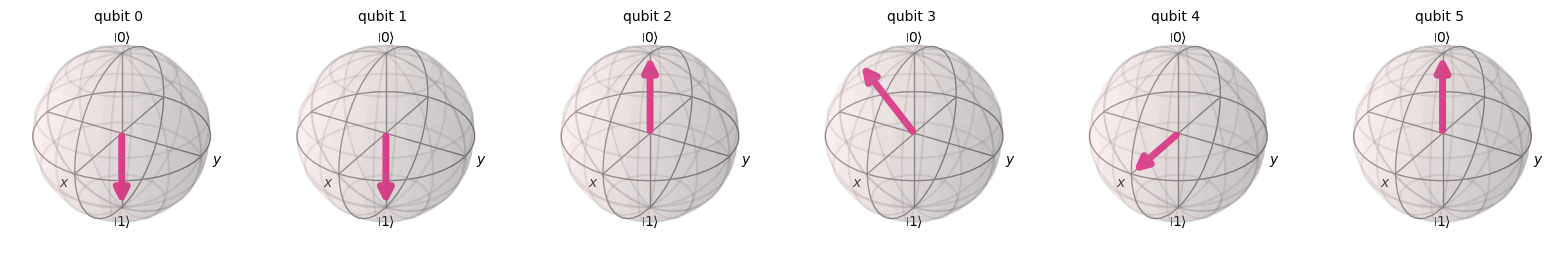

In [20]:
qc = QuantumCircuit(6)
qc.x(0)
qc.y(1)
qc.z(2)
qc.rx(math.pi /4, 3)
qc.ry(math.pi /2, 4)
qc.rz(math.pi * 2, 5)
qc.draw(output='mpl')
plot_bloch_multivector(qc)

In [21]:
qc.measure_all()
simulator = BasicSimulator()
result = simulator.run(qc).result()
counts = result.get_counts()
print(counts)

{'010011': 475, '000011': 429, '011011': 55, '001011': 65}


## Portas utilizando multiplos QUBITS

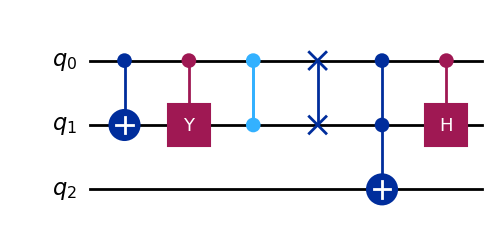

In [22]:
qc = QuantumCircuit(3)
qc.cx(0, 1)
qc.cy(0,1)
qc.cz(0,1)
qc.swap(0,1)
qc.ccx(0,1,2)
qc.ch(0,1)
qc.draw(output='mpl')

## Simulando uma porta NAND

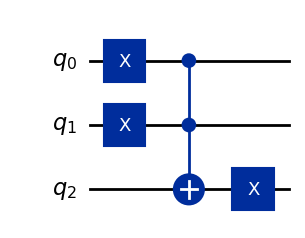

In [23]:
qc = QuantumCircuit(3)
# qc.ccx(0, 1, 2)
# qc.x(2)
#qc.cx(0,1)
#qc.x(0)
qc.x([0,1])
qc.ccx(0,1,2)
qc.x(2)
qc.draw(output='mpl')

## Somatória com circuitos Quânticos

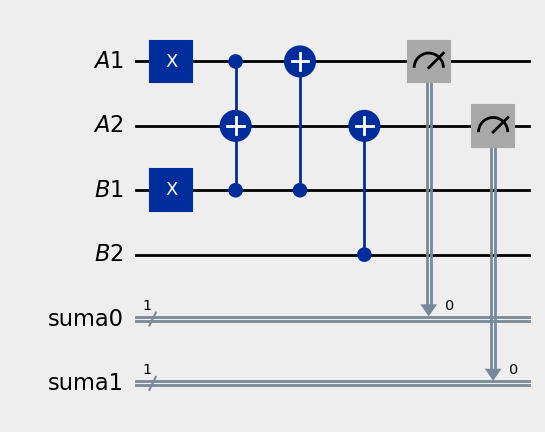

In [26]:
# Suma A = A + B
a1 = QuantumRegister(1, "A1")
a2 = QuantumRegister(1, "A2")
b1 = QuantumRegister(1, "B1")
b2 = QuantumRegister(1, "B2")
suma1 = ClassicalRegister(1,"suma0")
suma2 = ClassicalRegister(1,"suma1")
qc = QuantumCircuit(a1,a2,b1,b2,suma1, suma2)

qc.x(a1)
# qc.x(a2)
qc.x(b1)
# qc.x(b1)
# qc.x(b1)

#sv_inicial = Statevector.from_label('0101')
#qc.initialize(sv_inicial)


qc.ccx(a1,b1,a2)
qc.cx(b1,a1)
qc.cx(b2,a2)

qc.measure(a1,suma1)
qc.measure(a2,suma2)

qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

In [28]:
simulator = AerSimulator()
result = simulator.run(qc).result()
counts = result.get_counts()
print(counts)

{'1 0': 1024}


## Geração de números aleatórios

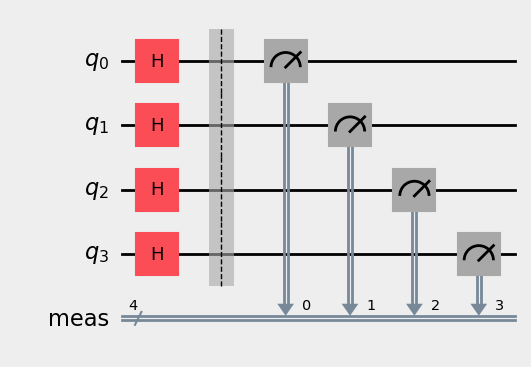

In [29]:
qcSuper = QuantumCircuit(4)
qcSuper.h(0)
qcSuper.h(1)
qcSuper.h(2)
qcSuper.h(3)
qcSuper.measure_all()
qcSuper.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})

In [30]:
#Corre el experimento del circuito anterior
simulator = AerSimulator()
result = simulator.run(qcSuper).result()
counts = result.get_counts()
print(counts)

{'0111': 65, '0101': 80, '1001': 61, '1110': 52, '1010': 60, '0000': 58, '0010': 60, '0011': 73, '0001': 63, '0110': 67, '1100': 70, '0100': 60, '1101': 67, '1111': 71, '1000': 63, '1011': 54}


## QFT Quantum Fourier Transform

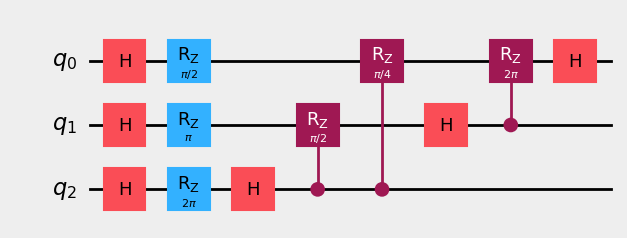

In [31]:
qc = QuantumCircuit(3)
qc.h(0)
qc.h(1)
qc.h(2)

qc.rz(math.pi /2, 0)
qc.rz(math.pi ,    1)
qc.rz(math.pi * 2, 2)


qc.h(2)
qc.crz(math.pi/2, 2, 1)
qc.crz(math.pi/4, 2, 0)
qc.h(1)
qc.crz(math.pi * 2, 1, 0)
qc.h(0)
qc.draw(output='mpl',style={'backgroundcolor': '#EEEEEE'})
#plot_bloch_multivector(qc)

## Mapa de QUBITS

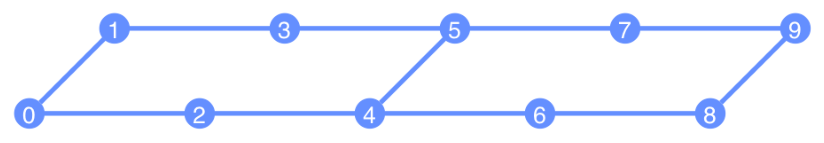

In [32]:
from qiskit.visualization import plot_coupling_map
num_qubits = 10

coupling_map = [[0,1],[1,3],[0,2],[2,4],[4,6], [6,8], [3,5], [5,7],[7,9], [4,5], [8,9]]
# conexiones entre QUBITS
qubit_coordinates = [[0,1], [1, 2], [0, 3], [1, 4], [0,5], [1,6], [0,7], [1,8], [0,9], [1,10]]
# capa
plot_coupling_map(num_qubits, qubit_coordinates, coupling_map)

## Decomposição de circuitos

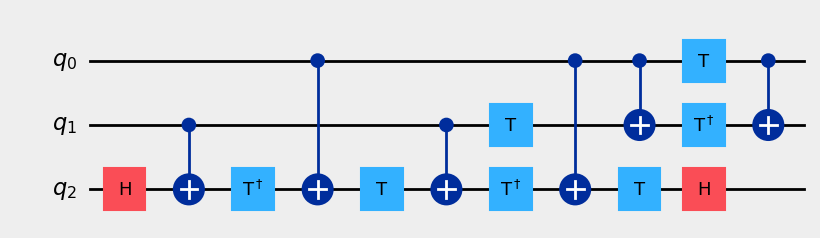

In [33]:
qc = QuantumCircuit (3)
qc.ccx (0,1,2)
qc.decompose().draw (style={'backgroundcolor': '#EEEEEE'}, output='mpl') #D - OK, BUT DECOMPOSE

## Transpilação

2


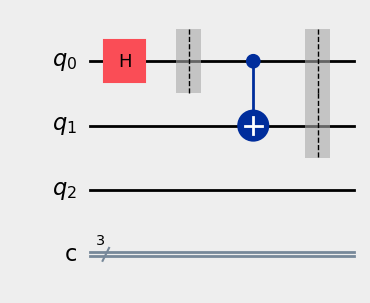

In [34]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_bloch_multivector

qc = QuantumCircuit(3, 3)
qc.h(0)
qc.barrier(0)
qc.cx(0,1)
qc.barrier([0,1])
depth = qc.depth()
print(depth)
qc.draw(style={'backgroundcolor': '#EEEEEE'}, output='mpl')

## QASM.

In [36]:
from qiskit.qasm3 import *
from qiskit.qasm3 import dumps
qc = QuantumCircuit(1, 1)
qc.h(0)
qc.x(0)

print(dumps(qc))

OPENQASM 3.0;
include "stdgates.inc";
bit[1] c;
qubit[1] q;
h q[0];
x q[0];



## Convertendo QASM para Qiskit

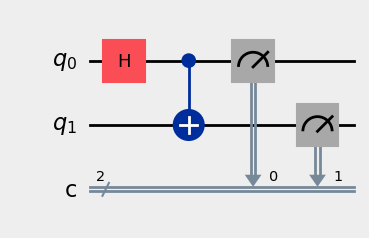

In [39]:
qasm_str = """OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
creg c[2];
h q[0];
cx q[0],q[1];
measure q -> c;
"""
qc = QuantumCircuit.from_qasm_str(qasm_str)
qc.draw(style={'backgroundcolor': '#EEEEEE'}, output='mpl')

## Controles de circuitos simples

In [40]:
qreg = QuantumRegister(2)
creg = ClassicalRegister(2)
qc = QuantumCircuit(qreg, creg)
with qc.switch(creg) as case:
    with case(0):
        qc.x(0)
    with case(1):
        qc.x(1)

qasm_string = qasm3.dumps(qc, experimental=qasm3.ExperimentalFeatures.SWITCH_CASE_V1)
print(qasm_string)

OPENQASM 3.0;
include "stdgates.inc";
bit[2] c1;
int switch_dummy;
qubit[2] q1;
switch_dummy = c1;
switch (switch_dummy) {
  case 0: {
    x q1[0];
  }
  break;
  case 1: {
    x q1[1];
  }
  break;
}



## QSphere.

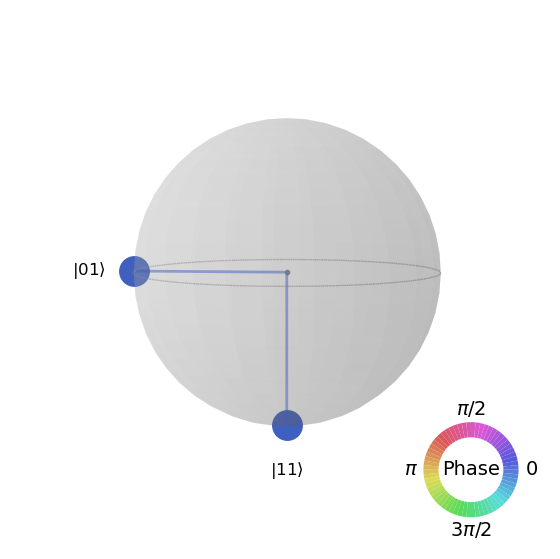

In [41]:
qc = QuantumCircuit(2)
qc.ry(math.pi, 0)
qc.h(1)

matrix = DensityMatrix(qc)
plot_state_qsphere(matrix, show_state_phases = False, use_degrees = False)

## Histogramas

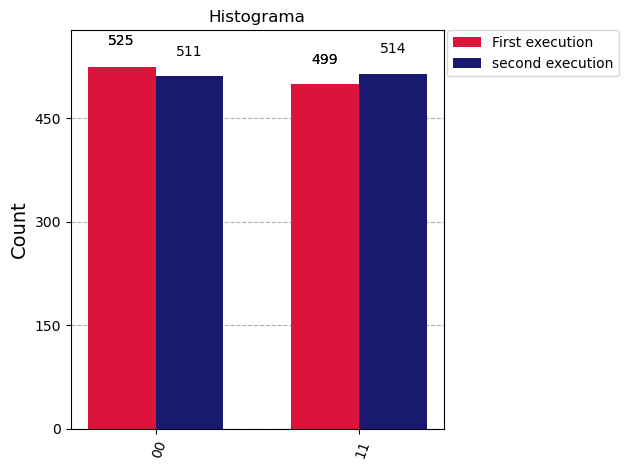

In [42]:
qc = QuantumCircuit(2,2)
qc.h(0)
qc.h(1)
qc.cx(0,1)

circ.measure_all()

simulator = BasicSimulator()
result = simulator.run(circ).result()
counts = result.get_counts()

counts1 = {'00': 525, '11': 499}
counts2 = {'00': 511, '11': 514}

legend = ['First execution', 'second execution']

#plot_histogram([counts], legend=legend, color=['crimson'],  title="Histograma")
plot_histogram([counts1, counts2], legend=legend, color=['crimson', 'midnightblue'], title="Histograma")

## State City.

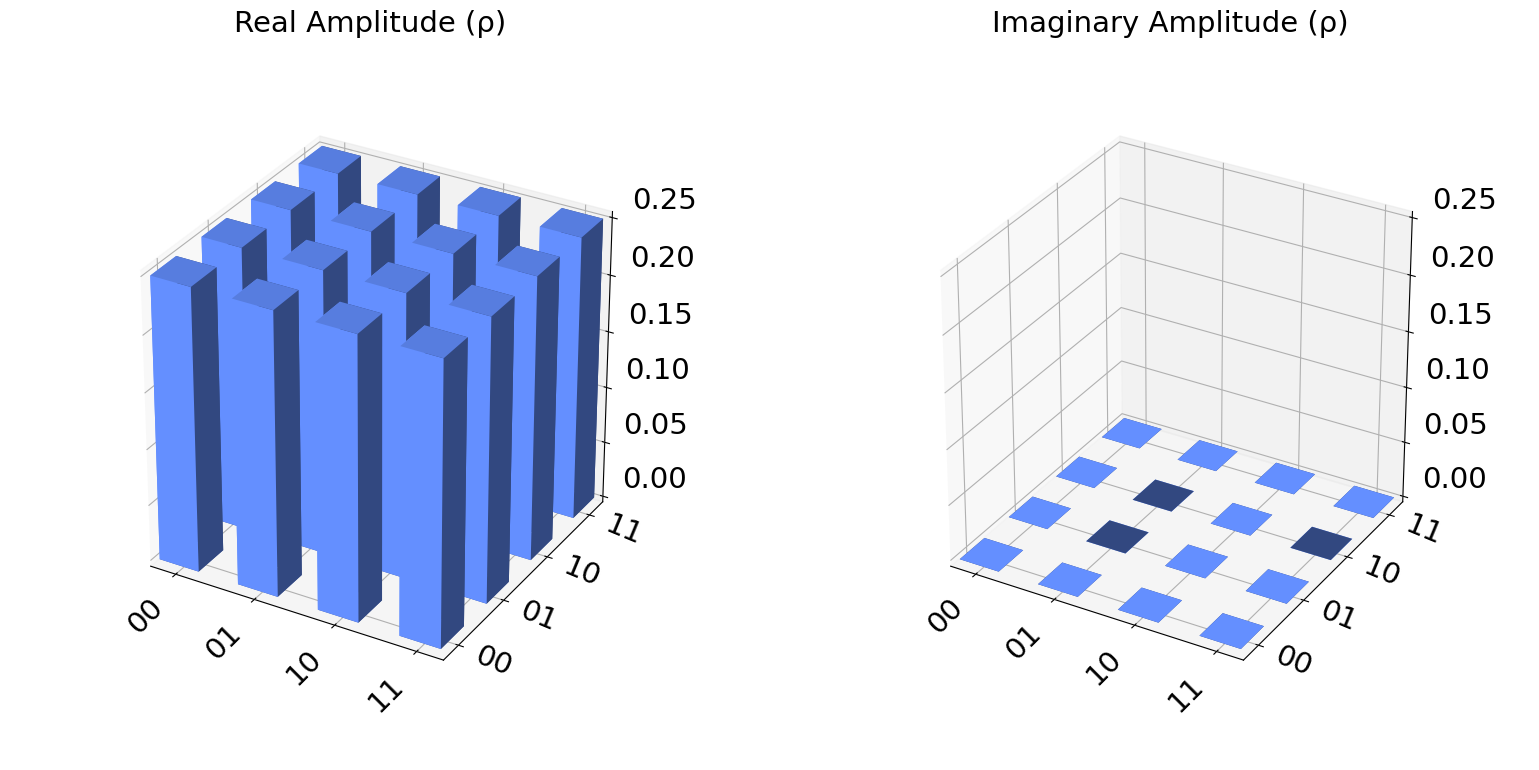

In [43]:
qc = QuantumCircuit(2,2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.measure_all()

# Current
qc.remove_final_measurements()  # no measurements allowed
statevector = Statevector(qc)
plot_state_city(statevector)

## Statevector.

In [44]:
from qiskit import QuantumCircuit
from math import sqrt
from qiskit.quantum_info import Statevector

qc = QuantumCircuit(1)
qc.h(0)
# qc.h(1)
# qc.cx(1, 2)
qc.measure_all()

qc.remove_final_measurements()
statevector = Statevector(qc)
print(statevector)

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


## Probabilidades na execução

In [45]:
from qiskit.providers.basic_provider import BasicSimulator
from qiskit import QuantumCircuit

circ = QuantumCircuit(1)
circ.h(0)
circ.measure_all()

simulator = BasicSimulator()
result = simulator.run(circ).result()
counts = result.get_counts()
print(counts)

{'0': 515, '1': 509}


##### Common Gates
GATE | rotation | name |
--- | --- | ---- |
qc.h | X+Z (pi) | hadamard (no angle) |
qc.i,qc.id | 0 | identity (no effect) |
qc.p | Z (∅) | Phase (change Phase - rotate Z Axis) |
qc.rx | X (∅) | RX  (need angle) | 
qc.ry | Y (∅) | RY  (need angle) | 
qc.rz | Z (∅) | RZ  (need angle) | 
qc.s | Z (PI/2) | same as p(PI/2, gate) | 
qc.sdg | Z (3PI/2) | same as p(3PI/2, gate) | 
qc.sx | X (PI/2) | same as rx(PI/2, gate) | 
qc.t | Z (PI/4) | same as p(PI/4, gate) | 
qc.tdg | Z (7PI/4) | same as p(7PI/4, gate) | 
qc.u | Y,Z,Z | Apply 3 angles to QUBIT (Y,Z,Z) this order  | 
qc.x | X | same as rx(PI, gate) | 
qc.y | Y | same as ry(PI, gate) | 
qc.z | z | same as rz(PI, gate) | 
###### MultiGates
GATE | rotation | name | 
--- | --- | ---- |
qc.ccx | X | X rotate controled by 2 QUBITs (no angle) - AKA TOFFOLI | 
qc.c3sx | sx | X rotate controled by 3 QUBITs (angle) | 
qc.c4sx | x | X rotate controled by 4 QUBITs (no angle) | 
qc.ch | H | Aply hadamard accoring control gate (no angle) | 
qc.cp | Y | Apply phase (Z) with angle controlled | 
qc.crx | X | rotate X with provided angle controled | 
qc.cry | Y | rotate Y with provided angle (same as TOFFOLI) | 
qc.crzb | Z | rotate Z with provided angle | 
qc.cswap | swap | swap two controled qubits | 
qc.csx | sx | pi/2 (square root) controled | 
qc.cu  | Y,Z,Z  | U controled | 
qc.cx,qc.cnot | X | Apply x controled (inversor) | 
qc.cy | Y | Apply y controled | 
qc.cz | Z | Apply z controled | 
qc.dcx | cx | Double cnot on two qubits (q1 cntrl q2 and q2 cntrl q1) | 
qc.iswap | swap | swap two qubits change phase | 
qc.mcp | P | apply phase 3 control | 
qc.mcx | X | apply X 3 control | 
qc.swap | swap | swap two qubits | 

This kind of question uses similar rotation 
GATE | rotation | name | 
--- | --- | --- |
qc.h | X+Z (pi) | hadamard (no angle) | 
qc.i,qc.id | 0 | identity (no effect) | 
qc.p | Z (∅) | Phase (change Phase - rotate Z Axis) | 
qc.rx | X (∅) | RX  (need angle) | 
qc.ry | Y (∅) | RY  (need angle) | 
qc.rz | Z (∅) | RZ  (need angle) | 
qc.s | Z (PI/2) | same as p(PI/2, gate) | 
qc.sdg | Z (3PI/2) | same as p(3PI/2, gate) | 
qc.sx | X (PI/2) | same as rx(PI/2, gate) | 
qc.t | Z (PI/4) | same as p(PI/4, gate) | 
qc.tdg | Z (7PI/4) | same as p(7PI/4, gate) | 
qc.u | Y,Z,Z | Apply 3 angles to QUBIT (Y,Z,Z) this order |  
qc.x | X | same as rx(PI, gate) | 
qc.y | Y | same as ry(PI, gate) | 
qc.z | z | same as rz(PI, gate) | 
      
      
**q.t(0) rotate PI/4 on Z\
q.s(0) rotate PI/2 on Z\
q.sdg(0) rotate 3PI/2 on Z\
q.tdg(0) rotate 7PI/4 on Z\
q.sx(0) rotate PI/2 on X\
q.x(0) rotate PI on X\
q.y(0) rotate PI on Y\
q.z(0) rotate PI on Z**

#### Based on that (other options): 
#### 2 * q.t() = q.s()
#### 2 * q.t() = q.rz(math.pi/4, 0)
#### 2* q.s() = 4 * q.t()
#### 2 * q.sx() = q.x()
